<a href="https://colab.research.google.com/github/Dhruvi509/movie-data-analysis/blob/main/Movie_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movie_data = pd.read_csv("/content/movies.csv")
movie_data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [ ]:
movie_data.shape

(9999, 9)

In [ ]:
(movie_data.isnull().sum()/movie_data.shape[0])*100

,0
MOVIES,0.000000
YEAR,6.440644
GENRE,0.800080
RATING,18.201820
ONE-LINE,0.000000
STARS,0.000000
VOTES,18.201820
RunTime,29.582958
Gross,95.399540


In [ ]:
movie_data.duplicated().sum()

431

In [ ]:
movie_data.drop_duplicates(subset=["MOVIES"], inplace=True)

In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6817 entries, 0 to 9996
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    6817 non-null   object 
 1   YEAR      6353 non-null   object 
 2   GENRE     6746 non-null   object 
 3   RATING    5815 non-null   float64
 4   ONE-LINE  6817 non-null   object 
 5   STARS     6817 non-null   object 
 6   VOTES     5815 non-null   object 
 7   RunTime   5305 non-null   float64
 8   Gross     452 non-null    object 
dtypes: float64(2), object(7)
memory usage: 532.6+ KB


In [ ]:
movie_data.describe()

,RATING,RunTime
count,5815.000000,5305.000000
mean,6.635529,78.499529
std,1.210105,49.608718
min,1.100000,1.000000
25%,5.900000,45.000000
50%,6.800000,82.000000
75%,7.500000,100.000000
max,9.400000,853.000000


**Data Cleaning**

In [ ]:
movie_data.columns = movie_data.columns.str.lower()
movie_data.columns

Index(['movies', 'year', 'genre', 'rating', 'one-line', 'stars', 'votes',
       'runtime', 'gross'],
      dtype='object')

In [ ]:
movie_data = movie_data.dropna(subset=["year"])

In [ ]:
def process_year(year):
    if pd.isna(year) or year.strip() == "":
        return None, None, None

    year = year.strip("()")
    year = year.replace("–", "-")

    if '-' in year:
        start, end = year.split('-')
        start = start.strip()
        end = end.strip()


        if end == "":
            return start, 'Ongoing', 'Series'
        return start, end, 'Series'

    else:
        return year, 'Not Applicable', 'Movie'

In [ ]:
movie_data[['start-year', 'end-year', 'type']] = movie_data['year'].apply(lambda x: pd.Series(process_year(x)))

In [ ]:
def process_genre(genre):
  if pd.isna(genre) or genre.strip() == "":
    return "Unknown"
  genre = genre.strip()
  genre = genre.replace("\n", "")
  genre_list = genre.split(", ")
  return genre_list

In [ ]:
movie_data['genre'] = movie_data['genre'].apply(process_genre)

In [ ]:
movie_data['rating'] = movie_data['rating'].fillna(movie_data['rating'].mean())

In [ ]:
movie_data["one-line"] = movie_data["one-line"].str.replace("\n", " ", regex=False).str.strip()

In [ ]:
import re

movie_data["stars"] = movie_data["stars"].str.replace("\n", " ", regex=False).str.strip()

movie_data["director"] = movie_data["stars"].apply(lambda x: re.search(r"Director:\s*(.*?)(?:\||$)", x))
movie_data["director"] = movie_data["director"].apply(lambda x: x.group(1).strip() if x else np.nan)

movie_data["stars"] = movie_data["stars"].apply(lambda x: re.sub(r"Director:.*?\|", "", str(x)).strip())

movie_data["stars"] = movie_data["stars"].str.replace("Stars:", "", regex=False).str.strip()

movie_data["stars"] = movie_data["stars"].replace("", "Not Available")
movie_data["director"] = movie_data["director"].fillna("Not Available")


In [ ]:
movie_data["stars"] = movie_data["stars"].apply(lambda x: x.split(", ") if isinstance(x, str) else np.nan)

In [ ]:
movie_data['votes'] = movie_data['votes'].str.replace(',', '').astype(float)
movie_data["votes"] = movie_data["votes"].fillna(movie_data["votes"].median())

In [ ]:
movie_data["runtime"] = pd.to_numeric(movie_data["runtime"], errors="coerce")
movie_data["runtime"] = movie_data["runtime"].fillna(movie_data["runtime"].mean())

In [ ]:
movie_data.drop(columns=["gross"], inplace=True)

In [ ]:
movie_data

,movies,year,genre,rating,one-line,stars,votes,runtime,start-year,end-year,type,director
0,Blood Red Sky,(2021),"[Action, Horror, Thriller]",6.100000,A woman with a mysterious illness is forced in...,"[Peri Baumeister, Carl Anton Koch, Alexander...",21062.0,121.000000,2021,Not Applicable,Movie,Peter Thorwarth
1,Masters of the Universe: Revelation,(2021– ),"[Animation, Action, Adventure]",5.000000,The war for Eternia begins again in what may b...,"[Chris Wood, Sarah Michelle Gellar, Lena Hea...",17870.0,25.000000,2021,Ongoing,Series,Not Available
2,The Walking Dead,(2010–2022),"[Drama, Horror, Thriller]",8.200000,Sheriff Deputy Rick Grimes wakes up from a com...,"[Andrew Lincoln, Norman Reedus, Melissa McBr...",885805.0,44.000000,2010,2022,Series,Not Available
3,Rick and Morty,(2013– ),"[Animation, Adventure, Comedy]",9.200000,An animated series that follows the exploits o...,"[Justin Roiland, Chris Parnell, Spencer Gram...",414849.0,23.000000,2013,Ongoing,Series,Not Available
4,Army of Thieves,(2021),"[Action, Crime, Horror]",6.635529,"A prequel, set before the events of Army of th...","[Matthias Schweighöfer, Nathalie Emmanuel, R...",1474.0,78.630912,2021,Not Applicable,Movie,Matthias Schweighöfer
...,...,...,...,...,...,...,...,...,...,...,...,...
9935,The Imperfects,(2021– ),"[Adventure, Drama, Fantasy]",6.635529,Add a Plot,"[Morgan Taylor Campbell, Chris Cope, Iñaki G...",1474.0,78.630912,2021,Ongoing,Series,Not Available
9964,AlRawabi School for Girls,(2021),[Drama],6.635529,Add a Plot,"[Salsabiela A., Joanna Arida, Yara Mustafa, ...",1474.0,78.630912,2021,Not Applicable,Movie,Tima Shomali
9993,Totenfrau,(2022– ),"[Drama, Thriller]",6.635529,Add a Plot,"[Felix Klare, Romina Küper, Anna Maria Mühe,...",1474.0,78.630912,2022,Ongoing,Series,Nicolai Rohde
9995,Arcane,(2021– ),"[Animation, Action, Adventure]",6.635529,Add a Plot,[Not Available],1474.0,78.630912,2021,Ongoing,Series,Not Available


In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6353 entries, 0 to 9996
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movies      6353 non-null   object 
 1   year        6353 non-null   object 
 2   genre       6353 non-null   object 
 3   rating      6353 non-null   float64
 4   one-line    6353 non-null   object 
 5   stars       6353 non-null   object 
 6   votes       6353 non-null   float64
 7   runtime     6353 non-null   float64
 8   start-year  6353 non-null   object 
 9   end-year    6353 non-null   object 
 10  type        6353 non-null   object 
 11  director    6353 non-null   object 
dtypes: float64(3), object(9)
memory usage: 645.2+ KB


In [ ]:
movie_data.drop(columns=['year'], inplace=True)

**Exploratory Data Analysis**

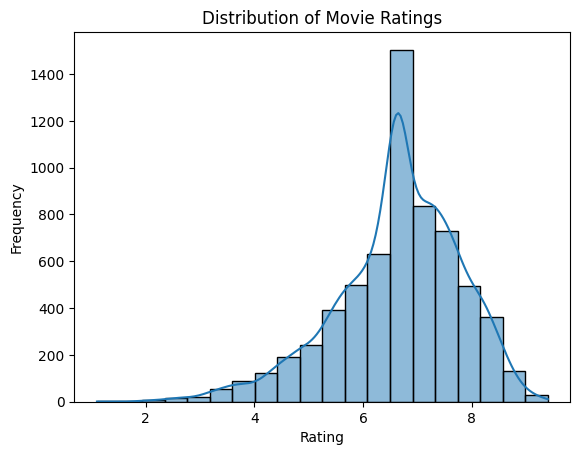

In [ ]:
sns.histplot(movie_data['rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

Observations:

1. Most movies are rated average (not too bad, not too great).
2. Ratings are not evenly spread, meaning viewers may be more likely to rate something 6-7 rather than extreme ratings like 1 or 10.
3. The presence of a right-skew suggests some low-rated movies exist but are not very common.

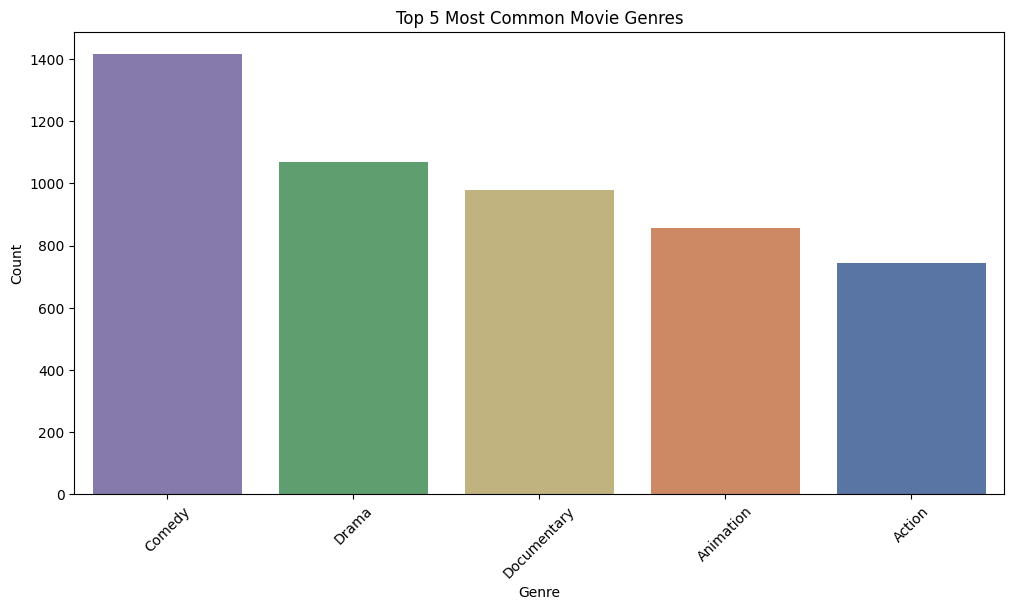

In [ ]:
movie_data["main_genre"] = movie_data["genre"].apply(lambda x: x[0] if isinstance(x, list) else "Unknown")

genre_counts = movie_data["main_genre"].value_counts().head(5)

plt.figure(figsize=(12,6))
sns.countplot(data=movie_data, x="main_genre", order=genre_counts.index, hue="main_genre", palette="deep")
plt.xticks(rotation=45)
plt.title("Top 5 Most Common Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

Observation:

1. Comedy is the most common movie genre, with the highest count.
2. Action is the least common among the top five genres.

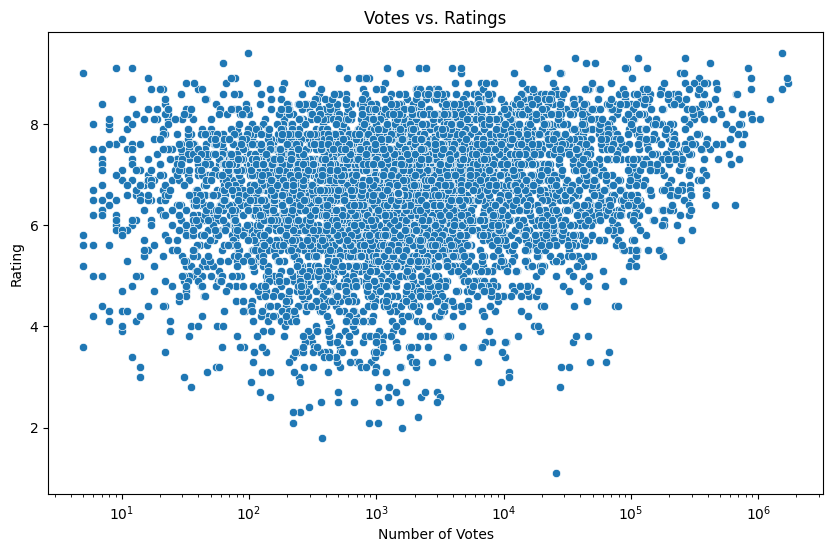

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=movie_data['votes'], y=movie_data['rating'])
plt.xscale("log")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.title("Votes vs. Ratings")
plt.show()

Observations:

1. Movies with a higher number of votes tend to have ratings clustered around 6 to 8.
2. Movies with fewer votes exhibit a wider range of ratings, including more extreme high and low values.

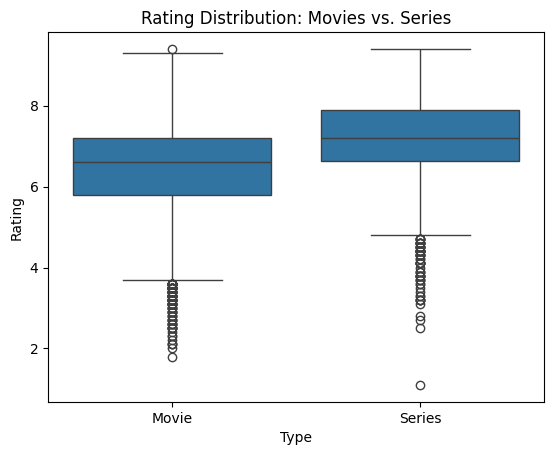

In [ ]:
sns.boxplot(x=movie_data["type"], y=movie_data["rating"])
plt.title("Rating Distribution: Movies vs. Series")
plt.xlabel("Type")
plt.ylabel("Rating")
plt.show()

Observations:

1. Series tend to have slightly higher median ratings than movies, with a more concentrated distribution around higher ratings.

2. However, movies have a wider range of ratings and more lower-rated outliers compared to series.


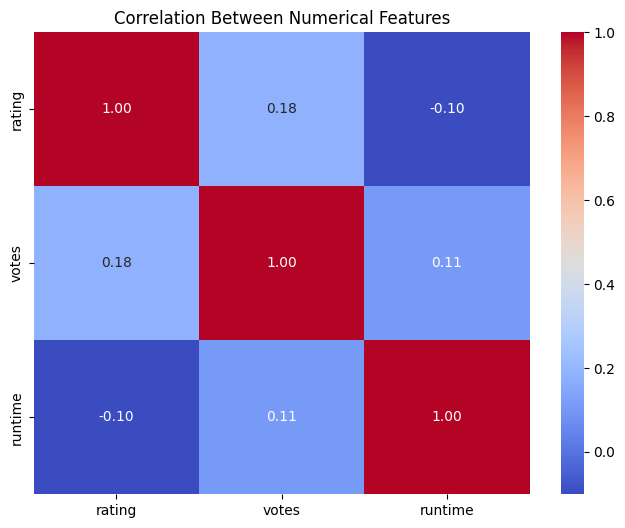

In [ ]:
numerical_features = movie_data.select_dtypes(include=np.number)


corr_matrix = numerical_features.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()

Observations:

1. There is a weak positive correlation between votes and ratings (0.18), meaning movies with more votes tend to have slightly higher ratings.
2. However, runtime has a weak negative correlation with rating (-0.10), suggesting longer movies may have slightly lower ratings, but the relationship is not strong.

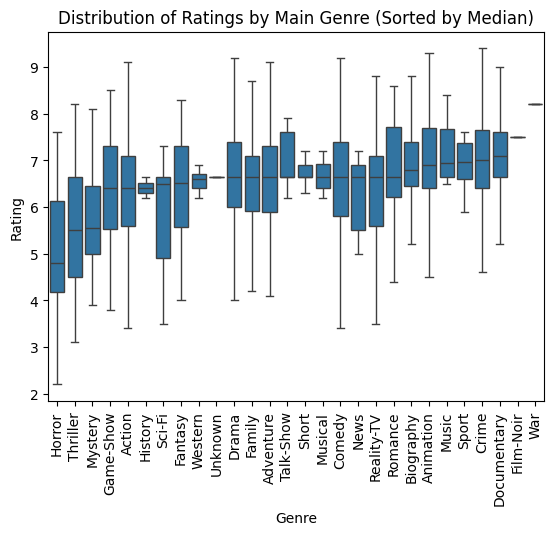

In [ ]:
sorted_genres = movie_data.groupby("main_genre")["rating"].median().sort_values().index

sns.boxplot(data=movie_data, x="main_genre", y="rating", order=sorted_genres, showfliers=False)
plt.xticks(rotation=90)
plt.title("Distribution of Ratings by Main Genre (Sorted by Median)")
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.show()

Observations:

1. Horror, Thriller, and Mystery have lower median ratings with high variability.
2. Documentary, Film-Noir, and War genres tend to receive higher and more consistent ratings.
3. Action, Sci-Fi, and Fantasy have moderate ratings but show a wide spread, indicating both highly rated and poorly rated movies exist.


In [ ]:
movie_data.to_csv("processed_movie_data.csv", index=False)